In [85]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
## reading dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

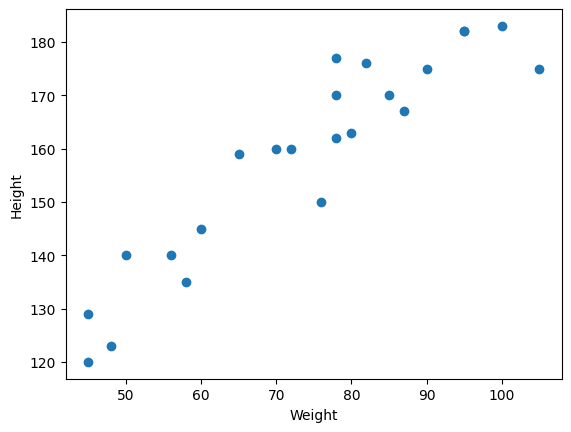

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [45]:
##dividing dataset into independent and dependent features
x=df[['Weight']]#independent
y=df['Height']#dependent

In [46]:
#train test split
from sklearn.model_selection import train_test_split

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [48]:
xtrain.shape

(18, 1)

In [49]:
#standardistion of data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)


In [50]:
xtest=scaler.transform(xtest)

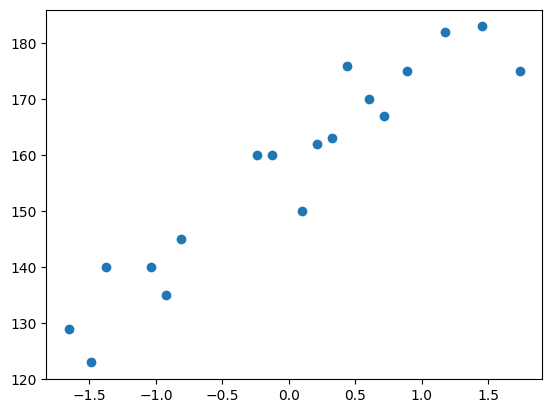

In [51]:
plt.scatter(xtrain,ytrain)

In [52]:
#train the smple linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [53]:
regressor.fit(xtrain,ytrain)

LinearRegression()

In [55]:
print("The slope or coefficient of weight is:", regressor.coef_)
print('Intercept:', regressor.intercept_)

The slope or coefficient of weight is: [17.03440872]
Intercept: 157.5


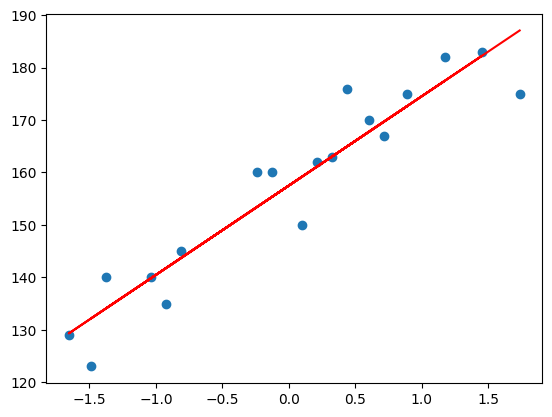

In [56]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,regressor.predict(xtrain),"r")

__**Prediction of train data**__

1.predicted height output=intercept+coef_(weights)
2.y_pred_train=157.5+17.03(x_train)

**__Prediction of test data__**

1.predicted height output= intercept +coef_(weights)
2.y_pred_test=157.5+17.03(x_test)

In [58]:
y_pred_test=regressor.predict(xtest)

In [60]:
y_pred_test,ytest

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

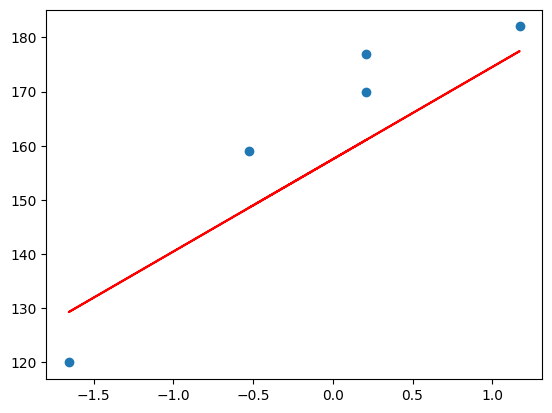

In [64]:
plt.scatter(xtest,ytest)
plt.plot(xtest,regressor.predict(xtest),'r')

Perfoormance metrics

mse, mae, rmse

R squaer and adjusted R square

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [66]:
mse=mean_squared_error(ytest,y_pred_test)
mae=mean_absolute_error(ytest,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


R^2=1-SSR/SST

In [67]:
from sklearn.metrics import r2_score
score=r2_score(ytest,y_pred_test)
score

0.776986986042344

Addjusted R^2

Adjusted r^2 = 1-[(1-r^2)*(n-1)/(n-k-1)],

n: the number of observation and 

K: the number of predictor variables

In [70]:
1- (1-score)*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)

0.7026493147231252

In [71]:
regressor

LinearRegression()

In [72]:
#new data point weight is 80
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\prash\Documents\PYTHON1\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [76]:
print("The height prediction for 80kg is: ",regressor.predict([scaled_weight[0]]))

The height prediction for 80kg is:  [163.01076266]


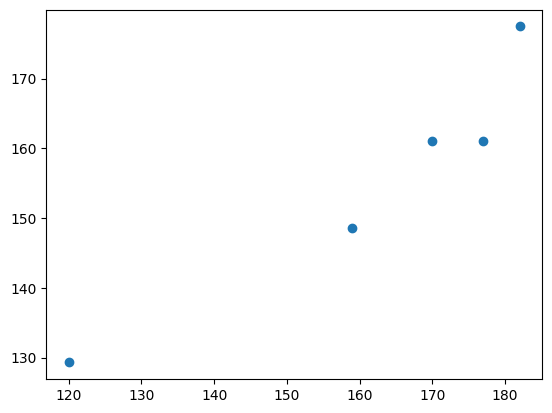

In [77]:
##assumptions
#plot a scatter plot for the prediciton
plt.scatter(ytest,y_pred_test)

In [78]:
#residuals
residuals=ytest-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

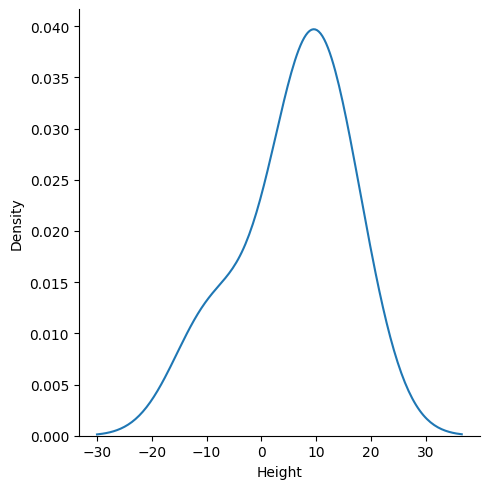

In [83]:
#plot this residuals
import seaborn as sns 
sns.displot(residuals,kind='kde')

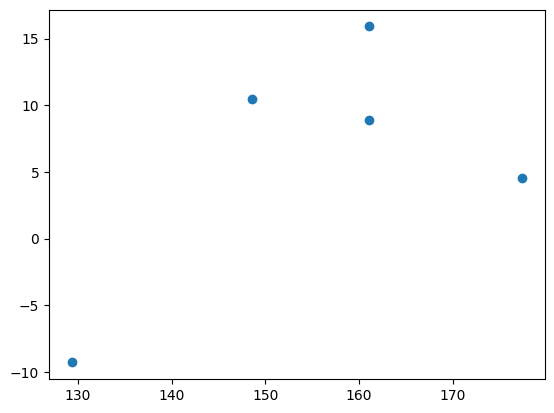

In [84]:
plt.scatter(y_pred_test,residuals)